# Validation Set 

This notebook will create a validation set that I can use.

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm import tqdm 
import sqlalchemy
import sys
import seaborn
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

sys.path.append('../')
from credentials import credentials

tqdm.pandas()
%matplotlib inline

In [2]:
# Getting the data
data = pd.read_csv('../data/prepared_training_set.csv')
data.head()

,row_id,essay,word_count,LLM_written,stop_word_count,stop_word_ratio,unique_word_count,unique_word_ratio,count_question,count_exclamation,count_semi,count_colon,grammar_errors,detector_pred,anger_pred,surprise_pred,sadness_pred,fear_pred
0,1,"Dear State Senator,\n\nI'm writting to you tod...",291,1,137,0.470790,131,0.450172,0,2,0,0,2,1,0,0,0,0
1,2,"Uh, hi! So, like, summers are, like, awesome r...",311,1,137,0.440514,121,0.389068,3,4,0,0,11,0,0,0,0,0
2,3,"When peoples ask for advices, they sometimes t...",333,1,158,0.474474,155,0.465465,0,1,0,0,6,0,0,0,0,0
3,4,I think art edukation is super impotent for ki...,308,1,121,0.392857,130,0.422078,0,0,0,0,48,0,0,0,1,0
4,5,I think we should totally switch to renewable ...,307,1,138,0.449511,146,0.475570,0,2,0,0,5,1,0,0,0,0


In [3]:
# Text cleaning 
def text_cleaning(essay:str) -> str:
    cleaned_text = essay.replace('\n',"")
    cleaned_text = essay.replace("\t","")
    
    return cleaned_text

# Cleaning the text
essays_cleaned = data['essay'].progress_apply(text_cleaning)

100%|██████████| 49929/49929 [00:01<00:00, 33846.27it/s]


In [5]:
# TFIDF Vectorizer
pattern = r'(?u)\b\w\w+\b|!|\?|\:|\;'
tfidf = TfidfVectorizer(token_pattern=pattern, ngram_range=(3,5),max_df=0.85,min_df=100,max_features=500,norm=None)
vectorized = tfidf.fit_transform(essays_cleaned)
transformed_data = pd.DataFrame(vectorized.toarray(),columns=tfidf.get_feature_names_out())
transformed_data.head()

,able to attend,able to do,able to use,according to the,action coding system,advantages of limiting,all of the,all over the,all the time,allow students to,...,would like to,would not be,you can do,you for your,you for your time,you get to,you have to,you need to,you want to,you will be
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.173458,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [6]:
# Combining the data
combined_data = pd.concat([data,transformed_data],axis=1)
combined_data.head()

,row_id,essay,word_count,LLM_written,stop_word_count,stop_word_ratio,unique_word_count,unique_word_ratio,count_question,count_exclamation,...,would like to,would not be,you can do,you for your,you for your time,you get to,you have to,you need to,you want to,you will be
0,1,"Dear State Senator,\n\nI'm writting to you tod...",291,1,137,0.470790,131,0.450172,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,2,"Uh, hi! So, like, summers are, like, awesome r...",311,1,137,0.440514,121,0.389068,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,3,"When peoples ask for advices, they sometimes t...",333,1,158,0.474474,155,0.465465,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.173458,0.0
3,4,I think art edukation is super impotent for ki...,308,1,121,0.392857,130,0.422078,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,5,I think we should totally switch to renewable ...,307,1,138,0.449511,146,0.475570,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [7]:
# Saving the vectorizer for later use
with open('../models/custom-features/tfidf-vectorizer.pk','wb') as file:
    pickle.dump(tfidf,file)

In [8]:
# Creating the database engine 
connector_string = f'mysql+mysqlconnector://{credentials["user"]}:{credentials["password"]}@{credentials["host"]}/AuthenticAI'
db_engine = sqlalchemy.create_engine(connector_string,echo=True)

# Connecting to the database
db_conn = db_engine.connect()

2024-01-24 22:45:34,935 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-01-24 22:45:34,937 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-01-24 22:45:34,945 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-01-24 22:45:34,947 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-01-24 22:45:34,950 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-01-24 22:45:34,952 INFO sqlalchemy.engine.Engine [raw sql] {}


In [9]:
# Getting the prompts
prompts = pd.DataFrame([i for i in db_conn.execute(sqlalchemy.text('select row_id, prompt from essays;'))])
prompts.head()

2024-01-24 22:45:35,667 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-24 22:45:35,670 INFO sqlalchemy.engine.Engine select row_id, prompt from essays;
2024-01-24 22:45:35,672 INFO sqlalchemy.engine.Engine [generated in 0.00640s] {}


,row_id,prompt
0,1,Write a letter to your state senator in which ...
1,2,Some schools require students to complete summ...
2,3,"When people ask for advice, they sometimes tal..."
3,4,Many people believe that arts education is ess...
4,5,"In recent years, there has been a push towards..."


In [10]:
# Mapping prompts to the essays by row_id
full_data = combined_data.join(prompts,on='row_id',how='left',rsuffix='_prompt')
full_data.drop(['row_id_prompt'],axis=1,inplace=True)
full_data.head()

,row_id,essay,word_count,LLM_written,stop_word_count,stop_word_ratio,unique_word_count,unique_word_ratio,count_question,count_exclamation,...,would not be,you can do,you for your,you for your time,you get to,you have to,you need to,you want to,you will be,prompt
0,1,"Dear State Senator,\n\nI'm writting to you tod...",291,1,137,0.470790,131,0.450172,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Some schools require students to complete summ...
1,2,"Uh, hi! So, like, summers are, like, awesome r...",311,1,137,0.440514,121,0.389068,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,"When people ask for advice, they sometimes tal..."
2,3,"When peoples ask for advices, they sometimes t...",333,1,158,0.474474,155,0.465465,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.173458,0.0,Many people believe that arts education is ess...
3,4,I think art edukation is super impotent for ki...,308,1,121,0.392857,130,0.422078,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,"In recent years, there has been a push towards..."
4,5,I think we should totally switch to renewable ...,307,1,138,0.449511,146,0.475570,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Your principal has decided that all students m...


In [11]:
# Closing connections and deleting the engine
db_conn.close()
db_engine.dispose()

2024-01-24 22:45:49,565 INFO sqlalchemy.engine.Engine ROLLBACK


In [12]:
# Seeing how many prompts there are 
full_data['prompt'].value_counts()

prompt
Write a letter to your state senator in which you argue in favor of keeping the Electoral College or changing to election by popular vote for the president of the United States. Use the information from the texts in your essay. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to include a claim; address counterclaims; use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your response in the space provided.    4517
Write an explanatory essay to inform fellow citizens about the advantages of limiting car usage. Your essay must be based on ideas and information that can be found in the passage set. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to use evidence from multiple sources; and avoid overly

There are 4985 unique prompts. I can randomly select a couple prompts for the validation set. I just need to ensure that the validation set has a good distribution of student essays and LLM written ones. Since the dataset is made up of approximately 50000 essays, I want to set 5000 aside for validation. From this 5000, I will set 1000 aside for testing. I can send the model into the competition for more validation.

In [13]:
# Getting the training and testing prompts
train_prompts = list(full_data['prompt'].value_counts()[:1200].to_dict().keys())
validation_prompts = list(full_data['prompt'].value_counts()[1200:].to_dict().keys())

In [14]:
# Splitting the data
training_data = full_data.where(full_data['prompt'].isin(train_prompts)).dropna(axis=0,how='any')
valid_data = full_data.where(full_data['prompt'].isin(validation_prompts)).dropna(axis=0,how='any')

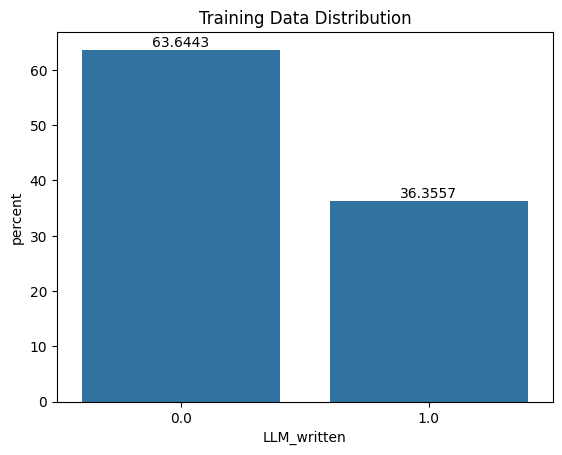

In [15]:
# Ensuring that the distribution of both classes isn't skewed
ax = seaborn.countplot(training_data,x='LLM_written',stat='percent')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Training Data Distribution')
plt.show()

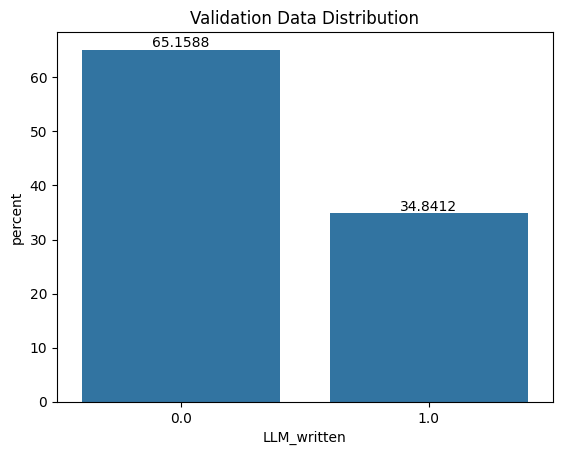

In [16]:
# Ensuring that the distribution of both classes isn't skewed
ax = seaborn.countplot(valid_data,x='LLM_written',stat='percent')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Validation Data Distribution')
plt.show()

Percentages look good, will save the files.

In [17]:
training_data.to_csv('../data/train.csv',index=False)
valid_data.to_csv('../data/validation.csv',index=False)